# State Farm Statistical Analysis: Seasonality in Quote Closures<a
href="#State-Farm-Statistical-Analysis:-Seasonality-in-Quote-Closures"
class="anchor-link">¶</a>

## Introduction: Data Initial Thoughts, Data Cleaning, and Hypothesis<a
href="#Introduction:-Data-Initial-Thoughts,-Data-Cleaning,-and-Hypothesis"
class="anchor-link">¶</a>

### Data prompt and objective<a href="#Data-prompt-and-objective" class="anchor-link">¶</a>

You have been given the business question: “What factors drive
seasonality for homeowners quotes and production (conversion)?”

Attached you will find an excel sheet with homeowner quotes that were
received in 2017 and 2018 (data has been modified as to not be actual
customer data). Using the attached data, please put together a one to
two page analysis that explains the possible causes of homeowners
seasonality. Also, consider how your analysis may help inform company
strategy.

Below is an explanation of the variables.

-   Month: Month quote was received
-   Year: Year quote was received
-   Home Purchase Year: Year home was purchased
-   Home/Auto Discount: Quote received a discount for also quoting auto
-   Amount of Insurance: Dollar amount the dwelling is insured for
-   First Point of Contact: Channel which quote was originally received
-   Written Indicator: 1 indicates State Farm wrote/converted the policy
-   Score: Credit rating of homeowner
-   Homeowner Age: Age of Homeowner
-   Aggregator: Indicates if quote was received from an aggregator

### Data summary statistics<a href="#Data-summary-statistics" class="anchor-link">¶</a>

The first thing I always like to do when working with a new dataset is
to familiarize myself with the data. I was already provided the
definitions of each category so I had a good understanding of what each
data point indicated; specifically that the dependent variable in any
analysis/model would be the binary variable "Written Indicator." I
plotted "Written Indicator" below, first by count of data points per
month, then by sum of "Written Indicator" by month. Then I plotted the
actual conversion rate per month by dividing the sum of Written
Indicator by the count of Written Indicator.

In \[528\]:

    from datetime import datetime
    ax = groupedSum.plot(x='date', y='count', figsize=(8,4))
    plt.title("Number of Data Points")
    plt.show()

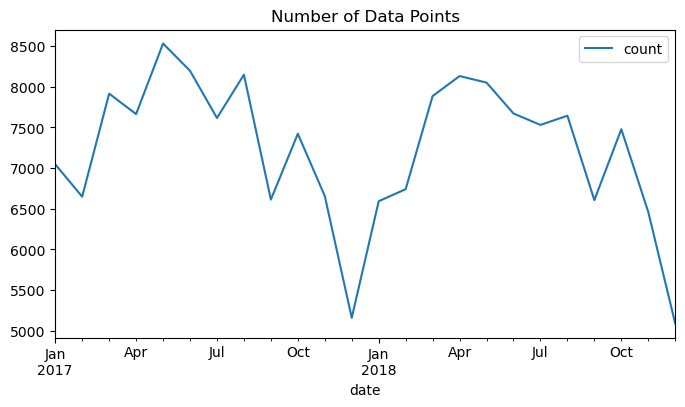

In \[529\]:

    ax = groupedSum.plot(x='date', y='sum', figsize=(8,4))
    plt.title("Sum of Written Indicator")
    plt.show()

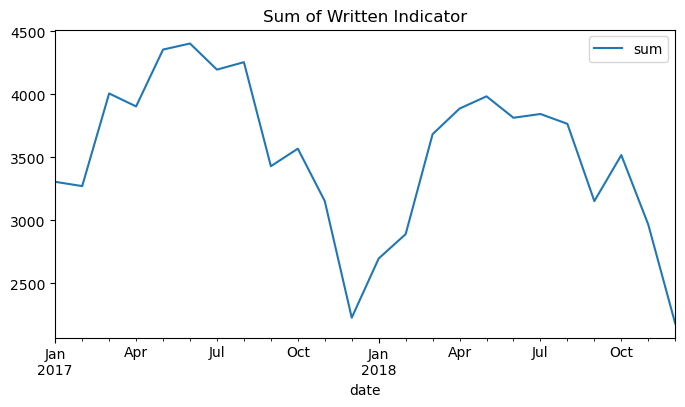

In \[535\]:

    groupedSum['percent'] = groupedSum['sum'] / groupedSum['count']
    ax = groupedSum.plot(x='date', y='percent', figsize=(8,4))
    plt.title("Conversion Rate")
    plt.show()

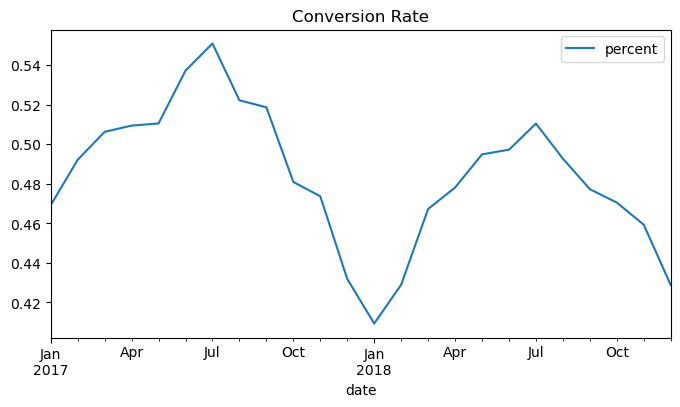

The first two graphs holding a relatively identical shape lets me know
that there is not an inbalance between Written Indicator = 1 and Written
Indicator = 0. You can also see a repeated pattern between 2017 and
2018. This would suggest that there is at least some form of yearly
seasonality with a slight trend downward from 2017 into 2018. Conversion
rate follows a similar trend, high in the summer and low in the winter.

Now that I have a basic understand of what Written Indicator looks like
and how it acts, I want to learn more about the other variables in the
dataset. To do this I'll just look at their surface level summary
statistics. At this point I just want to look at minimum, maximum, mean,
and try to determine if there are any weird data points or extreme
outliers.

In \[514\]:

    display(data.describe())

|       | Month         | Year          | Home Purchase Year | Home/Auto Discount | Amount of Insurance | Written Indicator | Score         | Homeower Age  |
|-------|---------------|---------------|--------------------|--------------------|---------------------|-------------------|---------------|---------------|
| count | 173501.000000 | 173501.000000 | 173501.000000      | 173501.000000      | 1.735010e+05        | 173501.000000     | 166166.000000 | 173501.000000 |
| mean  | 6.321318      | 2017.495000   | 2010.456591        | 0.862652           | 2.699337e+05        | 0.486833          | 713.582761    | 49.458885     |
| std   | 3.302199      | 0.499976      | 13.797872          | 0.344215           | 1.791350e+05        | 0.499828          | 113.864637    | 14.385552     |
| min   | 1.000000      | 2017.000000   | 1007.000000        | 0.000000           | 9.500000e+02        | 0.000000          | -1.000000     | 20.000000     |
| 25%   | 4.000000      | 2017.000000   | 2006.000000        | 1.000000           | 1.700500e+05        | 0.000000          | 647.000000    | 38.000000     |
| 50%   | 6.000000      | 2017.000000   | 2016.000000        | 1.000000           | 2.280000e+05        | 0.000000          | 731.000000    | 48.000000     |
| 75%   | 9.000000      | 2018.000000   | 2017.000000        | 1.000000           | 3.144500e+05        | 1.000000          | 796.000000    | 60.000000     |
| max   | 12.000000     | 2018.000000   | 2019.000000        | 1.000000           | 7.046150e+06        | 1.000000          | 884.000000    | 131.000000    |

Right away I can see a few weird things in the data. First thing that
caught my eye was the negative credit score and the homeower aged 131.
For the sake of not manipulating the data or adding any of my own
personal bias, I want to leave as many data points in the dataset as
possible; however, I will be removing some extreme outliers before
creating any models because I believe some of the data points are
falsely entered and show be discarded.

Below are graphs that illustrate some of the features of the dataset.
They were created by aggregating the converted quotes per month and
decomposing the results to find any trends or seasonality. The first
graph is the dataset plotted just like before. The second graph is a
visualization of the trends present in the data. In our case we have a
downward trend between July 2017 and July 2018. The third graph
highlights the shape of the seasonality in our data with the trend and
residuals removed. As you can see there is a definite repeated pattern
in 2017 and 2018 with a yearly frequency.

In \[521\]:

    from statsmodels.tsa.seasonal import seasonal_decompose

    #grouped.set_index('date', inplace=True)
    groupedSum.set_index('date', inplace=True)
    analysis = groupedSum[['sum']].copy()


    decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

    #trend = decompose_result_mult.trend
    #seasonal = decompose_result_mult.seasonal
    #residual = decompose_result_mult.resid

    decompose_result_mult.plot();

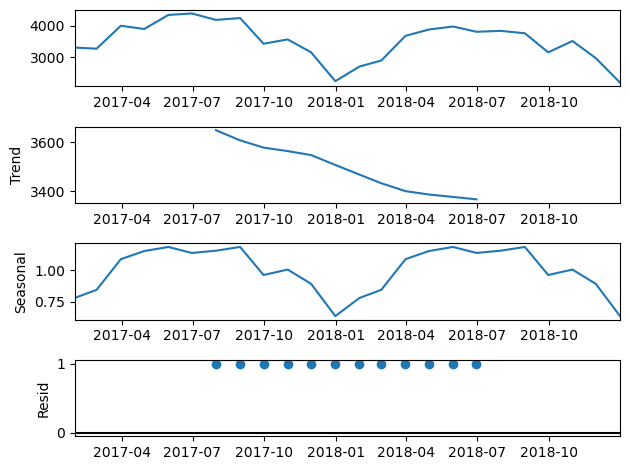

### Data cleaning<a href="#Data-cleaning" class="anchor-link">¶</a>

The first manipulation I want to do is removing outliers that I am sure
are incorrect data points. I believe that any data point where the
homeower is 90 or over is most likely an invalid data point. I find it
very unlikely that an individual over 90 is purchasing a new house. In
an ideal scenerio I would cross check the data point to confirm its
legitimacy, but for this use case I am going to use caution with how
many data points I remove and carry forward with their removal. With
that same logic, I believe any house purchased prior to 1940 is also an
invalid data point, either the homeower is over 90 or the house has
changed hands since then and the data point would have a newer purchase
year. Finally, the default minimum baseline for credit score according
to Experian is 300, so scores lower will be removed.

In \[364\]:

    #dropping bad data points/extreme outliers
    print("Number of quotes with unusual age: " + str(len(data[data['Homeower Age'] > 90])))
    print("Number of quotes with too low score: " + str(len(data[data['Score'] < 300])))
    print("Number of quotes purchased unusually long ago: " + str(len(data[data['Home Purchase Year'] < 1940])))

    data = data[data['Homeower Age'] <= 90]
    data = data[data['Score'] >= 300]
    data = data[data['Home Purchase Year'] >= 1940]

    Number of quotes with unusual age: 502
    Number of quotes with too low score: 664
    Number of quotes purchased unusually long ago: 197

Another thing I need to do before any analysis can be performed is
convert the fields "Aggregator" and "First Point of Contact" into binary
dummy variables. To do this, I created new features called
"AggregatorUsed," where 1 indicates the homeower used an aggregator
website and 0 indicates they did not, and "Agent," where 1 indicates the
homeower's first POC was an All State agent and 0 indicates they
initially used the website.

I also flattened and trasmuted the month column into binary month
features where if the record was recorded in February the "Feb" column
would be 1 and if not it would be 0. I did this for all months except
for January since January would not be included in the model anyway and
will act as our baseline for interpretation. I also created a feature
called "t" which will act as a continuous time variable. For example,
Jan 2017 = 1, Feb 2017 = 2, ..., Dec 2018 = 24.

Here is what the summary statistics look like after removing the
outliers and adding the new binary features. I did try the analyses
below first with the outliers in and again without the outliers and the
results changed very minimally. Although the results didn't change
drastically, I am happy with my reasoning for removing them and do not
believe I compromised the integrity of the analysis.

In \[468\]:

    display(data.describe())

|       | Year          | Written Indicator | t             | Feb           | Mar           | Apr           | May           | Jun           | Jul           | Aug           | ... | Oct           | Nov           | Dec           | Home/Auto Discount | Agent         | Aggregator_Used | Home Purchase Year | Amount of Insurance | Score         | Homeower Age  |
|-------|---------------|-------------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|---------------|-----|---------------|---------------|---------------|--------------------|---------------|-----------------|--------------------|---------------------|---------------|---------------|
| count | 164809.000000 | 164809.000000     | 164809.000000 | 164809.000000 | 164809.000000 | 164809.000000 | 164809.000000 | 164809.000000 | 164809.000000 | 164809.000000 | ... | 164809.000000 | 164809.000000 | 164809.000000 | 164809.000000      | 164809.000000 | 164809.000000   | 164809.000000      | 1.648090e+05        | 164809.000000 | 164809.000000 |
| mean  | 2017.493784   | 0.507509          | 12.245521     | 0.076598      | 0.091506      | 0.091615      | 0.095511      | 0.092125      | 0.087835      | 0.091275      | ... | 0.085450      | 0.075069      | 0.058656      | 0.867137           | 0.880085      | 0.036266        | 2010.839942        | 2.701526e+05        | 716.192119    | 49.214315     |
| std   | 0.499963      | 0.499945          | 6.843362      | 0.265953      | 0.288328      | 0.288483      | 0.293920      | 0.289203      | 0.283056      | 0.288001      | ... | 0.279552      | 0.263503      | 0.234980      | 0.339428           | 0.324863      | 0.186952        | 10.566227          | 1.791269e+05        | 104.863191    | 14.168214     |
| min   | 2017.000000   | 0.000000          | 1.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | ... | 0.000000      | 0.000000      | 0.000000      | 0.000000           | 0.000000      | 0.000000        | 1940.000000        | 9.500000e+02        | 300.000000    | 20.000000     |
| 25%   | 2017.000000   | 0.000000          | 6.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | ... | 0.000000      | 0.000000      | 0.000000      | 1.000000           | 1.000000      | 0.000000        | 2007.000000        | 1.710000e+05        | 648.000000    | 38.000000     |
| 50%   | 2017.000000   | 1.000000          | 12.000000     | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | ... | 0.000000      | 0.000000      | 0.000000      | 1.000000           | 1.000000      | 0.000000        | 2017.000000        | 2.280000e+05        | 732.000000    | 48.000000     |
| 75%   | 2018.000000   | 1.000000          | 18.000000     | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | 0.000000      | ... | 0.000000      | 0.000000      | 0.000000      | 1.000000           | 1.000000      | 0.000000        | 2017.000000        | 3.154000e+05        | 796.000000    | 60.000000     |
| max   | 2018.000000   | 1.000000          | 24.000000     | 1.000000      | 1.000000      | 1.000000      | 1.000000      | 1.000000      | 1.000000      | 1.000000      | ... | 1.000000      | 1.000000      | 1.000000      | 1.000000           | 1.000000      | 1.000000        | 2019.000000        | 7.046150e+06        | 884.000000    | 90.000000     |

8 rows × 21 columns

### Hypothesis<a href="#Hypothesis" class="anchor-link">¶</a>

At this stage I am thinking that a logistic regression would be the best
model for classification. I believe that months in the summer will have
a positive effect on converting quotes and that months in the winter
will have a negative effect. I would also guess that credit score would
have a strong positive correlation with converting quotes. It would also
makes sense that having an increased amount of human interaction would
increase the conversion rate of quotes, whether that be an agent being
the first point of contact or future follow up calls. I believe that t,
Agent, Score, and one or more months will be critical to the performance
of the classification models.

## Data Observations and Analysis<a href="#Data-Observations-and-Analysis" class="anchor-link">¶</a>

### Hypertuning: Recursive Feature Elimination and Feature Selection<a
href="#Hypertuning:-Recursive-Feature-Elimination-and-Feature-Selection"
class="anchor-link">¶</a>

There are a few things I want to do before I start any form of modeling.
First, I want to check if there are any features that are strongly
correlated with eachother. This would tell me that I should not include
both features in my model. I also want to see if the features behave
differently when Written Indicator = 1 or 0. To do this I can split them
into the two categories and create boxplots. If the two box plots are
noticeably different then it would suggest that they have strong
predictive power. Finally I want to do some form hypertuning to reduce
the number of features in the model. I don't want to risk overfitting by
including everything or spend computing power/time doing a manual form
of backward selection.

In the correlation matrix we can see that none of the features are
strongly correlated to any of the other features. Our scale on the right
ranges from -0.5 to 0.3, neither the min or max of this range would
constitute a strong correlation and the removal of one of the features.
The best argument would be Home Purchase Year and the strong negative
correlation with Homeower Age. Since it is only a -0.5 correlation I am
inclined to leave it in at this stage.

In \[369\]:

    #Drop the outcome:
    df_corr = data.drop(["Written Indicator","Month","Year"], axis=1)
    #Build heatmap:
    corr_matrix=df_corr.corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_matrix, mask=mask, square=True)

    C:\Users\ryanp\AppData\Local\Temp\ipykernel_24944\3283029493.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
      corr_matrix=df_corr.corr()

Out\[369\]:

    <Axes: >

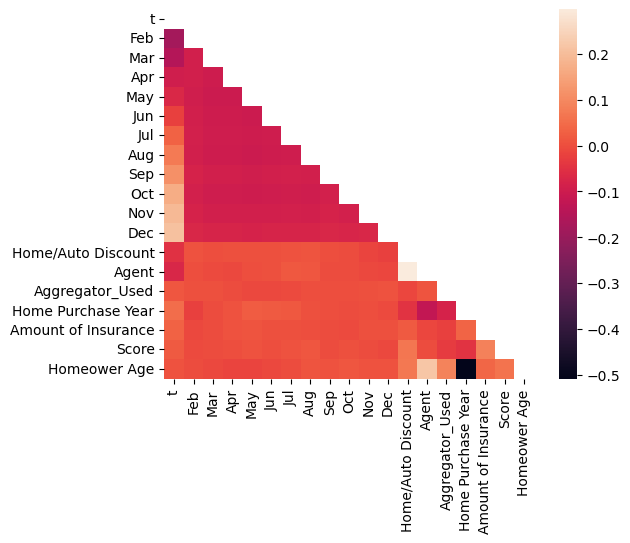

Below are the resulting box plots. Dummy variables like Agent, month,
etc. were not graphed due to the nature of there only being two possible
values and all features containing both of the values. We can see below
that "t," our time variable, has a similar distribution for Written
Indicator = 0 and 1 with a slightly lower mean for Written Indicator
= 1. Home Purchase Year has a drastically different box plot for Written
Indicator 0 and 1 which suggests it would be a good feature to include
in the models. Same thing for Score and Homeower Age.

In \[471\]:

    fig, axs = plt.subplots(2, 2, figsize=(20, 25))
    sns.boxplot(x=data["Written Indicator"], y=data["t"], ax=axs[0, 0])
    sns.boxplot(x=data["Written Indicator"], y=data["Home Purchase Year"],ax=axs[0, 1])
    sns.boxplot(x=data["Written Indicator"], y=data["Score"], ax=axs[1, 0])
    sns.boxplot(x=data["Written Indicator"], y=data["Homeower Age"], ax=axs[1, 1])
    plt.show()

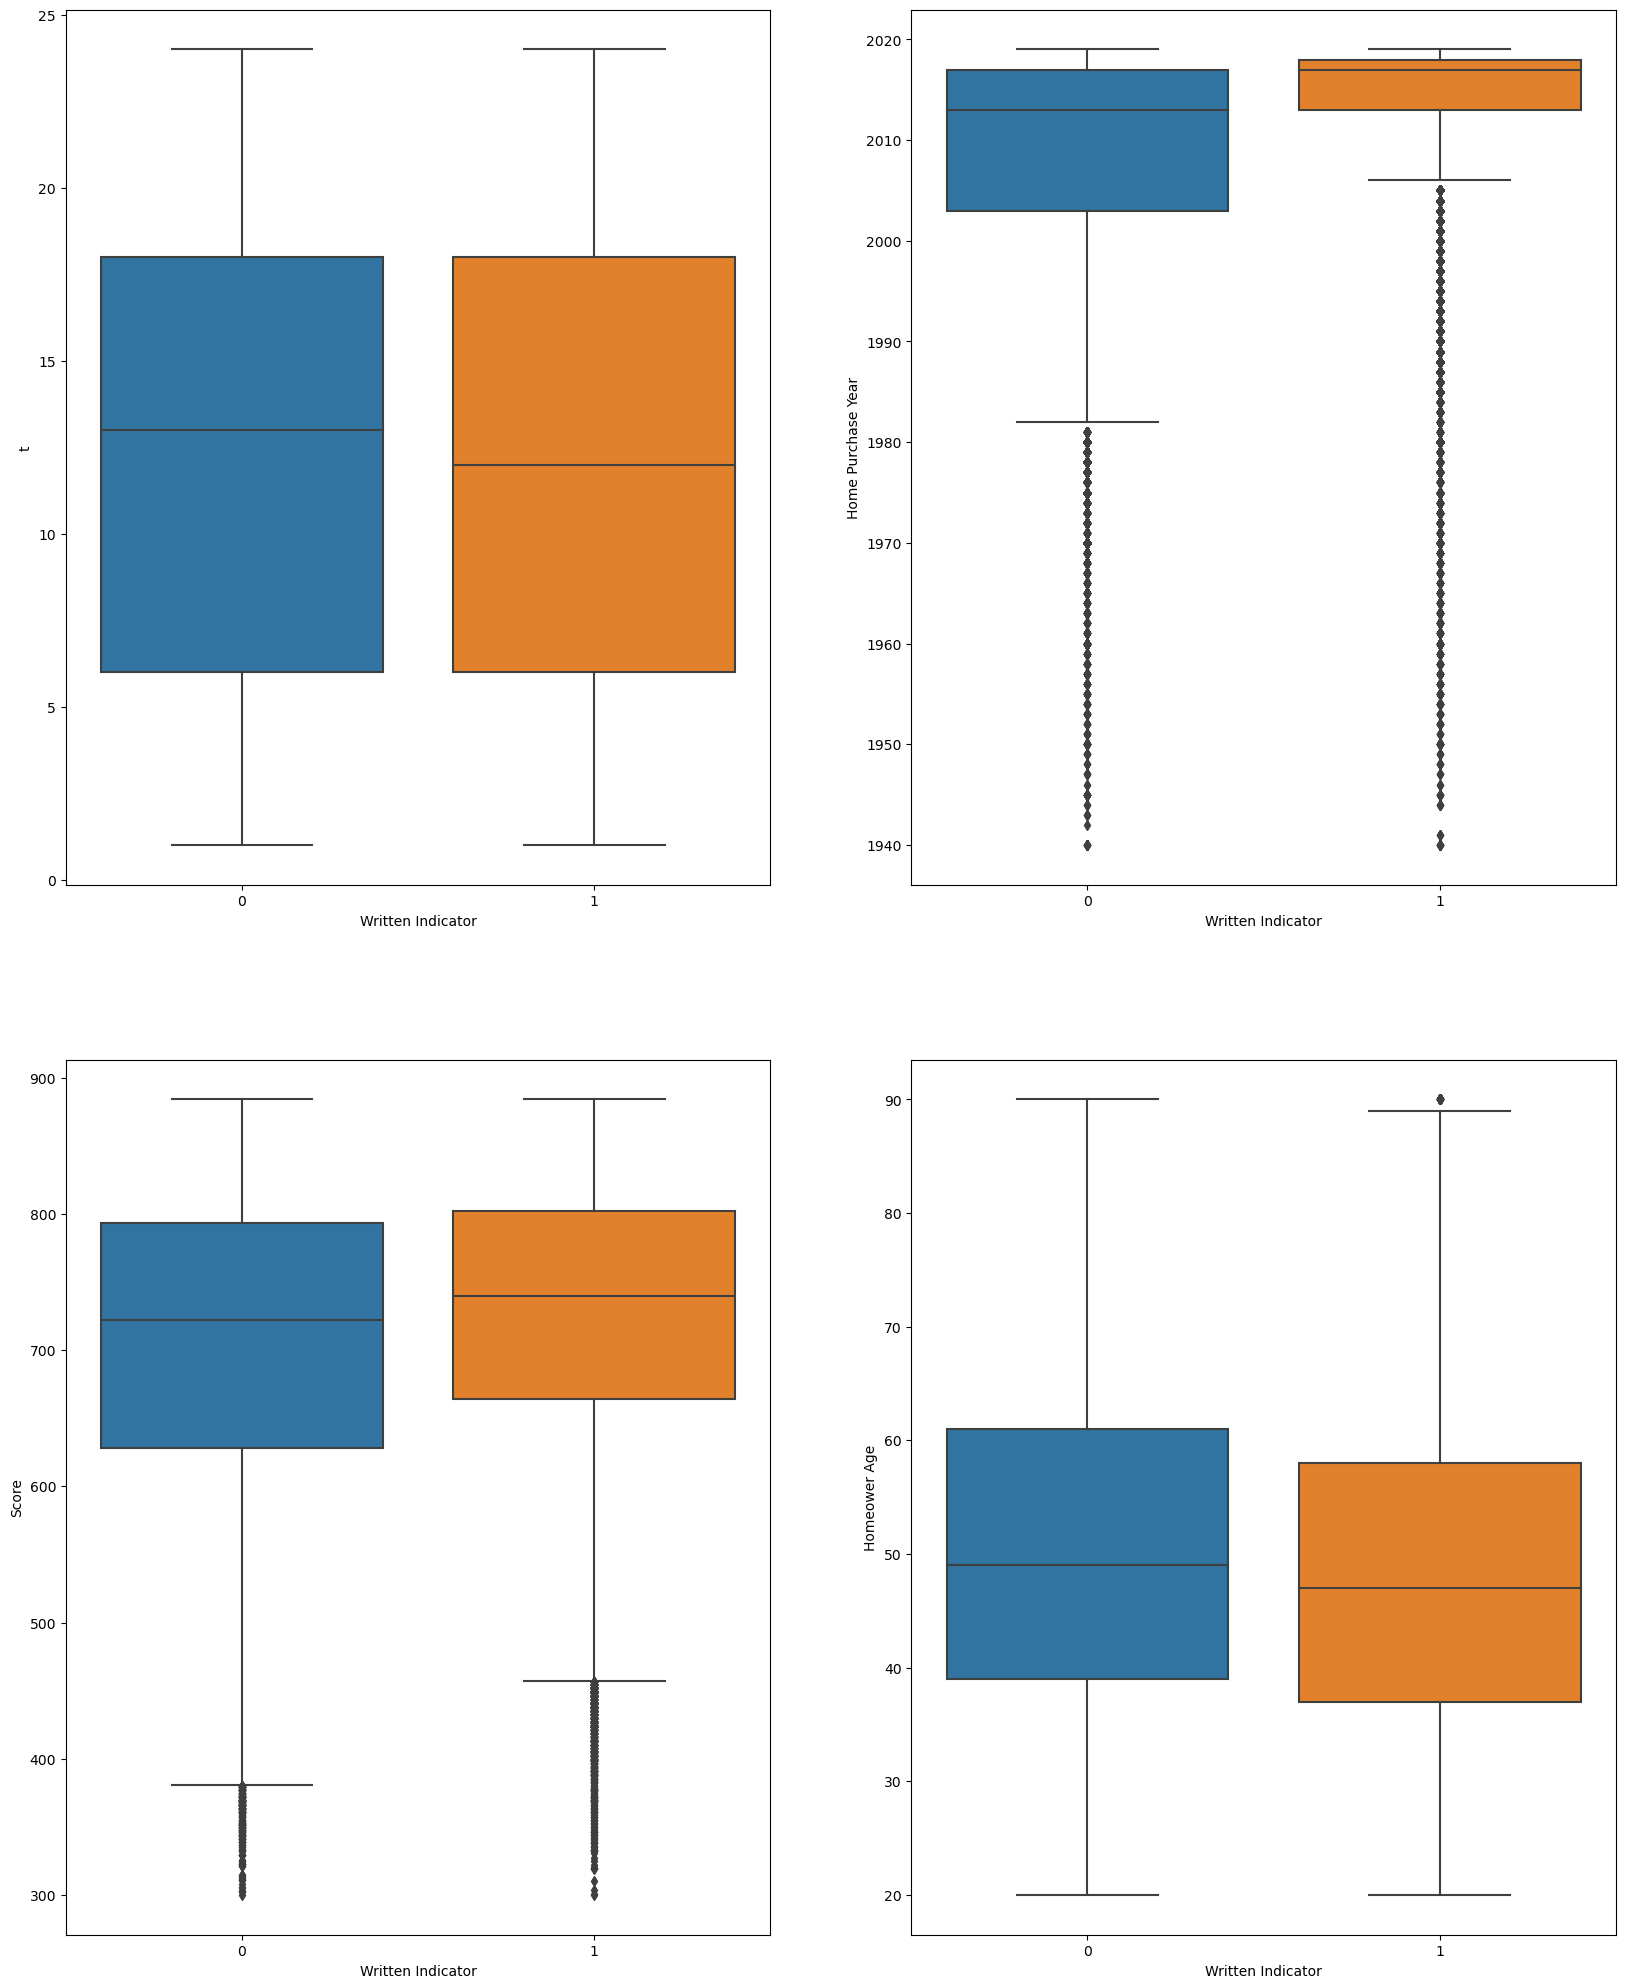

Here I use a simple Recursive Feature Elimination function to assign
each feature a rank. The results suggest that we should only use the
features t, Jul, Dec, Home/Auto Discount, Agent, Aggregator_Used, Home
Purchase Year, Score, and Homeower Age.

In \[467\]:

    logreg = LogisticRegression()
    rfe = RFE(logreg, step = 20)
    rfe = rfe.fit(X, y)
    print(feature_cols)
    print(rfe.support_)
    print(rfe.ranking_)

    ['t', 'Jul', 'Dec', 'Home/Auto Discount', 'Agent', 'Aggregator_Used', 'Home Purchase Year', 'Score', 'Homeower Age']
    [ True False False False False False  True False False False False  True
      True  True  True  True False  True  True]
    [1 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 2 1 1]

### Logistic Regression<a href="#Logistic-Regression" class="anchor-link">¶</a>

#### Model Summary<a href="#Model-Summary" class="anchor-link">¶</a>

The most obvious approach that stuck out to me was logistic regression.
When I first received the prompt I was already thinking it could be a
good starting point before I even finished reading the entire email. In
the model below I used only the features deemed important by the RFE. I
tried using the entire dataset as well with some backwards selection
based on statistical significance; however, the results did not improve
and I did not want to risk overfitting.

The model resulted in roughly 60% classification accuracy with full
statistical significance across the features.

In \[384\]:

    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

    Accuracy of logistic regression classifier on test set: 0.59

In \[385\]:

    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print(result.summary())

    Optimization terminated successfully.
             Current function value: 0.662363
             Iterations 5
                               Logit Regression Results                           
    ==============================================================================
    Dep. Variable:      Written Indicator   No. Observations:               164809
    Model:                          Logit   Df Residuals:                   164800
    Method:                           MLE   Df Model:                            8
    Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                 0.04426
    Time:                        15:41:09   Log-Likelihood:            -1.0916e+05
    converged:                       True   LL-Null:                   -1.1422e+05
    Covariance Type:            nonrobust   LLR p-value:                     0.000
    ======================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
    --------------------------------------------------------------------------------------
    t                     -0.0039      0.001     -5.065      0.000      -0.005      -0.002
    Jul                    0.1622      0.018      8.973      0.000       0.127       0.198
    Dec                   -0.1714      0.022     -7.683      0.000      -0.215      -0.128
    Home/Auto Discount     0.8670      0.017     52.508      0.000       0.835       0.899
    Agent                  0.6597      0.017     38.269      0.000       0.626       0.693
    Aggregator_Used       -0.7269      0.029    -25.014      0.000      -0.784      -0.670
    Home Purchase Year    -0.0008   2.08e-05    -40.240      0.000      -0.001      -0.001
    Score                  0.0019   4.89e-05     38.298      0.000       0.002       0.002
    Homeower Age          -0.0183      0.000    -49.137      0.000      -0.019      -0.018
    ======================================================================================

The features with the strongest effect on Written Indicator appear to be
Home/Auto Discount (positively), Agent (positively), and Aggregator_Used
(negatively). Home/Auto Discount tells me that people are likely to
convert their All State quote if they already have auto insurance with
All State or if they can gain a significant discount when purchasing
both. These results also tell me that there is a high importance of
human connection throughout the process. Homeowers are far more likely
to convert their quote if they initially spoke with an agent instead of
going through the website for an automated quote. On the other hand,
State Farm loses a lot of quotes when the Homeower uses an aggregator to
weigh their options across the market.

In \[386\]:

    import seaborn as sns

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Out\[386\]:

    Text(0.5, 427.9555555555555, 'Predicted label')

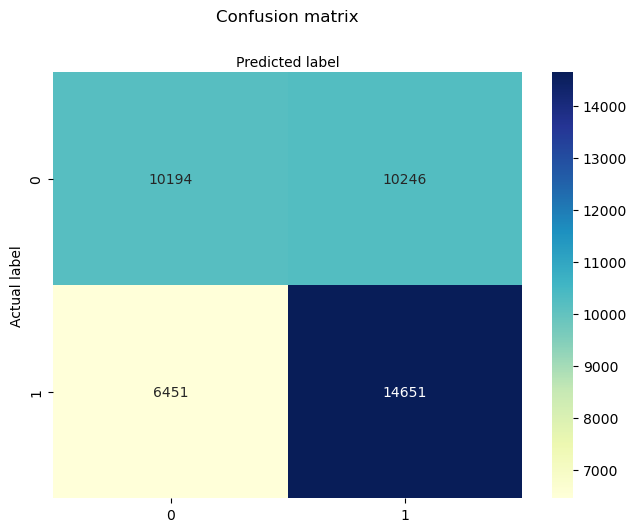

Above is the confusion matrix of the above logistic regression. Although
the overall accuracy of the model is relatively low at 0.6, the
confusion matrix shows a good area for improvement. The model has a
pretty low false negative rate (6451 / 21102), indicating that it is
pretty successful at classifying sale conversions; however the false
positive rate is just about equal to the true negative rate. This is
definitely weighing down the model's overall success and tells me that
there is a piece of information missing from the dataset/model that
could be vital to determining when a quote will not convert into a sale.
With more metadata or that missing feature, this model has good
potential to improve its accuracy.

### Random Forest<a href="#Random-Forest" class="anchor-link">¶</a>

#### Forest Map and Results<a href="#Forest-Map-and-Results" class="anchor-link">¶</a>

Although the results of the logistic regression are easy to interpret
and the model had full statistical significance, I wanted to try other
methods to try to increase classification accuracy. The next method I
tried was creating a random forest. I used the same features in the
forest as I did in the logistic regression (tried full dataset again
just in case). I capped the max depth of the tree at 5 because when I
used the default parameters the results were way overfitted for the
training set and poorly matched the test set. Below are the results of a
random forest with max depth = 5 using the features t, Jul, Dec,
Home/Auto Discount, Agent, Aggregator_Used, Score, Homeower Age.

In \[399\]:

    rf_5 = RandomForestClassifier(max_depth=5)
    rf_5.fit(X_train, y_train)
    print("accuracy on training set: %f" % rf_5.score(X_train, y_train))
    print("accuracy on test set: %f" % rf_5.score(X_test, y_test))

    accuracy on training set: 0.595842
    accuracy on test set: 0.600813

In \[401\]:

    import matplotlib.image as mpimg

    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(40)

    img = mpimg.imread('tree.png')
    plt.imshow(img)
    plt.show()

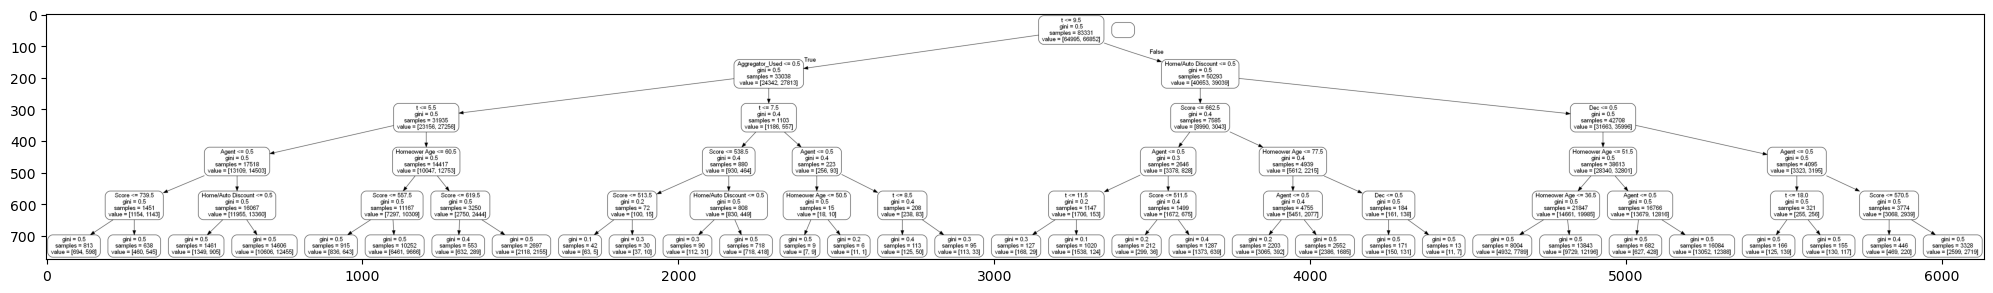

Using a random forest resulted in no significant classification accuracy
so at this point I am still more inclined to use the logistic
regression. Mostly because I am biased and prefer that method for simple
classification, but also because the results are easier to digest and
explain. Although I plan to abandon the random forest, I wanted to see
how the forest determined each feature's importance. Below is a graph of
feature importance from the forest above. Here we see that the most
important feature was score followed by Homeower Age, t (makes sense
with the downward trend in the dataset), Home/Auto Discount, then Agent.

In \[398\]:

    plt.plot(rf.feature_importances_, 'o')
    plt.xticks(range(X.shape[1]), X.columns, rotation=90)
    plt.ylim(0, 1)

Out\[398\]:

    (0.0, 1.0)

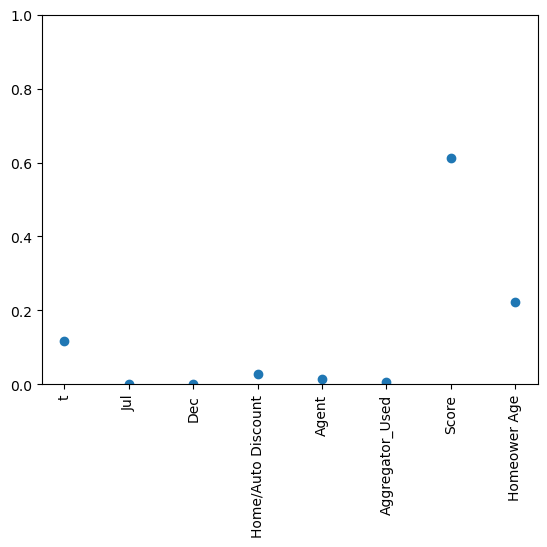

### Deep Learning - Keras Classification<a href="#Deep-Learning---Keras-Classification"
class="anchor-link">¶</a>

#### DL Results<a href="#DL-Results" class="anchor-link">¶</a>

Finally, just for fun, I tried to use deep learning. Disclaimer, I would
not usually use deep learning for an analysis like this. There are
plenty of other predictive/forecasting methods that are fair simpler,
use less computing power, take less time, and perform very similarly.

For this model I used Keras classification with the full list of
features. I trained this model for 150 epochs in batches of 10 using the
Adam optimizer and calculating my loss on binary cross entropy. Binary
cross entropy is a model metric that tracks incorrect labeling of the
data class by a model, penalizing the model if deviations in probability
occur into classifying the labels, similar to a log-loss calculation
used in a logistic regression. Adam optimization is a stochastic
gradient descent method that is based on adaptive estimation of
first-order and second-order moments. It is probably the most common
optimization used in Keras classification, I did not want to test out
other optimizers because this effort was more for fun than for actual
analysis since this is not the typical analysis I would suggest for this
type of problem.

After 150 iterations the Keras classification model performed worse than
logistic regression and random forest with an average classification
accuracy of 50.75%.

In \[411\]:

    _, accuracy = model.evaluate(X, y)
    print('Accuracy: %.2f' % (accuracy*100))

    5151/5151 [==============================] - 5s 855us/step - loss: 0.6930 - accuracy: 0.5075
    Accuracy: 50.75

## Analysis Results<a href="#Analysis-Results" class="anchor-link">¶</a>

The confusion matrix suggests there is room for improvement and
potentially missing information from the model that could be the link
between determining if a quote is converted or not. The results from the
logitic regression suggest that there is a heavy emphasis on the human
interaction of things and State Farm's relationship with the homeower.
According to the logistic regression things like Home/Auto Discout,
First Point of Contact, and Aggregator strongly influence the conversion
of a quote.

Interestingly, the random forest suggests that metadata about the
homeower are more important. The random forest picked up trends in
credit score and homeower age to determine the likelihood of converting
a quote. It also marked t as a feature of high importance. t was a good
feature to include in an analysis using historical data as it was used
to indicate trends; however, it would be interesting to see how that
feature would behave with current data.

## Company Strategy Takeaways<a href="#Company-Strategy-Takeaways" class="anchor-link">¶</a>

There is definitely seasonality in the conversion of quotes in this
dataset. Referring back to the graphs that showed trend and seasonality,
there are obvious conversion peaks during the summer and valleys in the
winter in both years. Recursive Feature Elimination eliminated every
month from the model except for July and December, the turning point
before conversions fell and the turning point before conversions start
to rise. This aligns with the seasonality of home sales, which makes
sense. Below is a historic graph of home sales and prices. Note that
there is a very cyclical yearly pattern with home sales spiking in the
summer and falling in the winter.

In \[531\]:

    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(8)

    img = mpimg.imread('homesales.png')
    plt.imshow(img)
    plt.show()

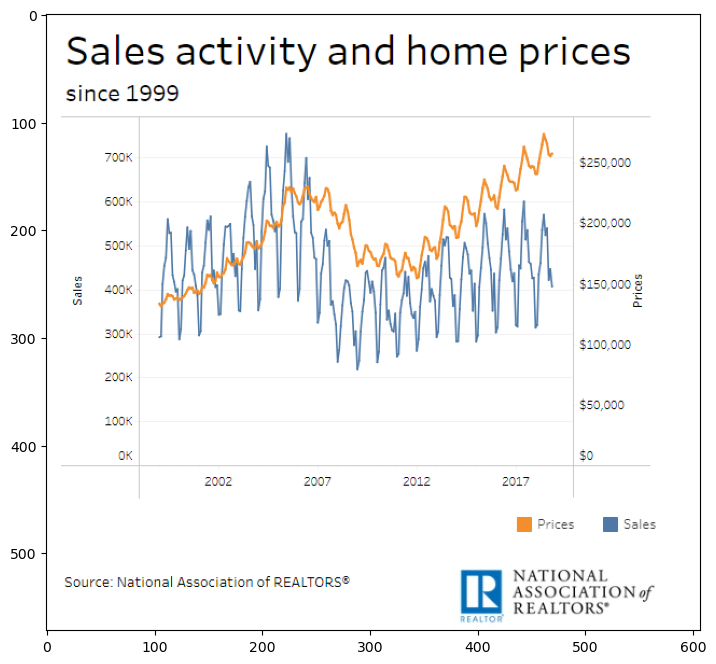

"Due to the fluctuations in supply and demand, it’s during this
identified "seasonal pattern" that you’ll find you don’t have as much
competition from the average homebuyer. With summer being the busiest
moving time of the year, people buy more aggressively than in the
winter, limiting the number of available houses and raising market
prices.

In the winter, however, since nobody wants to deal with the
inconvenience of moving during this time, these low-demand periods are
perfect for those who are looking for a good deal. Because sellers
aren’t necessarily getting a lot of interest or offers from others,
they’re more willing to negotiate and you’re able to obtain a
substantial discount on pricing."

<https://www.investopedia.com/articles/investing/010717/seasons-impact-real-estate-more-you-think.asp>

State Farm has the ability to combat this seasonal market. There is
probably not much State Farm can do about the house market, when people
buy homes they need to buy home insurance. But State Farm can focus on a
few areas in the winter months to help bring up the number of
conversions. I would recommend that State Farm agents increase their
interaction with homeowers as much as possible during the winter months.
The logistic regression suggests that being the first point of contact
is crucial to converting a quote. Nobody likes cold calls and insurance
isn't typically the industry that elicits them, but we could interpret
the first point of contact as that human element in the process which
State Farm can implement at any stage of the process. Another thing
State Farm could attempt to drive conversions in the winter is any form
of deal, specifically with bundling. The regression shows strong
influence of bundling on conversion so winter promotions for home/auto
bundles could increase conversion rate. Aggregators are a hard thing to
compete with just due to their one stop shop nature but State Farm could
look into Google Analytics and SO to increase traffic to the State Farm
website, potentially could be marketing campaigns, page promotions, etc.
The random forest placed a heavier emphasis on homeower metadata, these
results could be used to target specific audiences to be conscious of
agent's time. The logistic regression and random forest agree that the
higher the credit score, the more likely the homeower is to convert.
Agents could potentially spend more time with homeowers with lower
credit scores to try to sway that ratio. Similar with homeower age,
agents could spend more time with older homeowers.

Ultimately, it appears that human connection and interaction is the key
to increasing conversions and the biggest area for improvement is during
the winter months. I am guilty of being a clueless home insurance seeker
and using an aggregator to get me started. Insurance is complicated and
if people are looking at an aggregator they are probably going to choose
the cheaper option. Also some mortgage loans require homeowner's
insurance to be below a certain yearly price. Policy price was not part
of the analysis, but that could be the missing link from the logistic
regression and could be a factor of driving certain homeower's away.

------------------------------------------------------------------------

# Code Appendix<a href="#Code-Appendix" class="anchor-link">¶</a>

## Data Prep and Cleaning<a href="#Data-Prep-and-Cleaning" class="anchor-link">¶</a>

In \[447\]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.dates as md
    import statsmodels.api as sm
    import numpy as np
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.metrics import classification_report
    from sklearn.model_selection import train_test_split
    from sklearn.feature_selection import RFE
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import export_graphviz
    import pydot
    from statsmodels.tsa.seasonal import seasonal_decompose
    from datetime import datetime

In \[491\]:

    #load in dataset into notebook
    data = pd.read_excel('Interview.xlsx',sheet_name = 'Homeowner Quotes')

In \[492\]:

    #sort data by policy quote date
    data = data.sort_values(['Year','Month']).reset_index(drop=True)

In \[442\]:

    grouped = data.groupby(['Month','Year']).size().reset_index().rename(columns={0:'count'}).sort_values(['Year','Month']).reset_index(drop=True)

In \[443\]:

    grouped['date'] = list(pd.date_range('2017-01-01','2019-01-01',freq='m'))

In \[444\]:

    grouped = grouped[['date','count']]

In \[524\]:

    groupedSum = data.groupby(['Year','Month'])['Written Indicator'].agg(['sum','count'])

In \[525\]:

    groupedSum['date'] = list(pd.date_range('2017-01-01','2019-01-01',freq='m'))
    groupedSum = groupedSum.reset_index(drop=True)
    groupedSum = groupedSum[['date','sum','count']]

In \[292\]:

    #function that creates a list of ones and zeros if the value passed in the function matches the value in the cell or not
    def monthBinary(data, monthNumber):
        binaryList = []
        for i in list(range(len(data))):
            if data['Month'][i] == monthNumber:
                binaryList.append(1)
            else:
                binaryList.append(0)
        return binaryList

In \[293\]:

    #create columns for new variables to be used in analysis. t = continuous time variable, months = binary indicator
    ##each month/year pair has a unique t value to represent time moving forward
    t = []
    for i in list(range(len(grouped))):
        individualMonthT = [i+1]*grouped['count'][i]
        t = t + individualMonthT
    data['t'] = t

    ##monthBinary function adds a 1 if the row is in the month depicted by the column, 0 if not
    data['Feb'] = monthBinary(data,2)
    data['Mar'] = monthBinary(data,3)
    data['Apr'] = monthBinary(data,4)
    data['May'] = monthBinary(data,5)
    data['Jun'] = monthBinary(data,6)
    data['Jul'] = monthBinary(data,7)
    data['Aug'] = monthBinary(data,8)
    data['Sep'] = monthBinary(data,9)
    data['Oct'] = monthBinary(data,10)
    data['Nov'] = monthBinary(data,11)
    data['Dec'] = monthBinary(data,12)

In \[294\]:

    #turn First Point of Contact and Aggregator into dummies variables
    poc = {'Agent': 1,'Internet': 0}
    aggregator = {'Aggregator': 1,'Non Aggregator': 0}
    data['Agent'] = [poc[item] for item in data['First Point of Contact']]
    data['Aggregator_Used'] = [aggregator[item] for item in data['Aggregator']]

In \[296\]:

    import calendar
    data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In \[297\]:

    data = data[['Month','Year','Written Indicator','t','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Home/Auto Discount','Agent','Aggregator_Used','Home Purchase Year','Amount of Insurance','Score','Homeower Age','First Point of Contact','Aggregator']]

In \[298\]:

    data = data.dropna()

In \[ \]:

    display(data.describe())

## Data Visualization<a href="#Data-Visualization" class="anchor-link">¶</a>

In \[452\]:

    grouped['date'] = pd.to_datetime(grouped['date'], format = '%Y-%m-%d %H:%M')

In \[367\]:

    display(data[data['Written Indicator'] == 1].describe())

|       | Year         | Written Indicator | t            | Feb          | Mar          | Apr          | May          | Jun          | Jul          | Aug          | ... | Oct          | Nov          | Dec          | Home/Auto Discount | Agent        | Aggregator_Used | Home Purchase Year | Amount of Insurance | Score        | Homeower Age |
|-------|--------------|-------------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-----|--------------|--------------|--------------|--------------------|--------------|-----------------|--------------------|---------------------|--------------|--------------|
| count | 83642.000000 | 83642.0           | 83642.000000 | 83642.000000 | 83642.000000 | 83642.000000 | 83642.000000 | 83642.000000 | 83642.000000 | 83642.000000 | ... | 83642.000000 | 83642.000000 | 83642.000000 | 83642.000000       | 83642.000000 | 83642.000000    | 83642.000000       | 8.364200e+04        | 83642.000000 | 83642.000000 |
| mean  | 2017.477428  | 1.0               | 12.056957    | 0.072786     | 0.091198     | 0.092322     | 0.098826     | 0.097499     | 0.095179     | 0.095012     | ... | 0.083941     | 0.072607     | 0.051995     | 0.922527           | 0.917063     | 0.022250        | 2012.690072        | 2.694084e+05        | 726.613017   | 48.001447    |
| std   | 0.499493     | 0.0               | 6.843165     | 0.259787     | 0.287892     | 0.289482     | 0.298430     | 0.296638     | 0.293464     | 0.293233     | ... | 0.277301     | 0.259492     | 0.222019     | 0.267342           | 0.275788     | 0.147495        | 9.774685           | 1.773907e+05        | 97.982676    | 13.857068    |
| min   | 2017.000000  | 1.0               | 1.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 0.000000           | 0.000000     | 0.000000        | 1940.000000        | 9.500000e+03        | 300.000000   | 20.000000    |
| 25%   | 2017.000000  | 1.0               | 6.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 1.000000           | 1.000000     | 0.000000        | 2013.000000        | 1.700500e+05        | 664.000000   | 37.000000    |
| 50%   | 2017.000000  | 1.0               | 12.000000    | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 1.000000           | 1.000000     | 0.000000        | 2017.000000        | 2.270500e+05        | 740.000000   | 47.000000    |
| 75%   | 2018.000000  | 1.0               | 18.000000    | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 1.000000           | 1.000000     | 0.000000        | 2018.000000        | 3.135000e+05        | 802.000000   | 58.000000    |
| max   | 2018.000000  | 1.0               | 24.000000    | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000     | ... | 1.000000     | 1.000000     | 1.000000     | 1.000000           | 1.000000     | 1.000000        | 2019.000000        | 5.346600e+06        | 884.000000   | 90.000000    |

8 rows × 21 columns

In \[368\]:

    display(data[data['Written Indicator'] == 0].describe())

|       | Year         | Written Indicator | t            | Feb          | Mar          | Apr          | May          | Jun          | Jul          | Aug          | ... | Oct          | Nov          | Dec          | Home/Auto Discount | Agent        | Aggregator_Used | Home Purchase Year | Amount of Insurance | Score        | Homeower Age |
|-------|--------------|-------------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-----|--------------|--------------|--------------|--------------------|--------------|-----------------|--------------------|---------------------|--------------|--------------|
| count | 81167.000000 | 81167.0           | 81167.000000 | 81167.000000 | 81167.000000 | 81167.000000 | 81167.000000 | 81167.000000 | 81167.000000 | 81167.000000 | ... | 81167.000000 | 81167.000000 | 81167.000000 | 81167.000000       | 81167.000000 | 81167.000000    | 81167.000000       | 8.116700e+04        | 81167.000000 | 81167.000000 |
| mean  | 2017.510639  | 0.0               | 12.439834    | 0.080525     | 0.091823     | 0.090887     | 0.092094     | 0.086587     | 0.080267     | 0.087425     | ... | 0.087006     | 0.077605     | 0.065519     | 0.810058           | 0.841980     | 0.050710        | 2008.933397        | 2.709195e+05        | 705.453460   | 50.464166    |
| std   | 0.499890     | 0.0               | 6.838170     | 0.272106     | 0.288778     | 0.287450     | 0.289160     | 0.281231     | 0.271707     | 0.282458     | ... | 0.281845     | 0.267551     | 0.247441     | 0.392257           | 0.364762     | 0.219407        | 11.003445          | 1.808966e+05        | 110.487279   | 14.375275    |
| min   | 2017.000000  | 0.0               | 1.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 0.000000           | 0.000000     | 0.000000        | 1940.000000        | 9.500000e+02        | 300.000000   | 20.000000    |
| 25%   | 2017.000000  | 0.0               | 6.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 1.000000           | 1.000000     | 0.000000        | 2003.000000        | 1.710000e+05        | 628.000000   | 39.000000    |
| 50%   | 2018.000000  | 0.0               | 13.000000    | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 1.000000           | 1.000000     | 0.000000        | 2013.000000        | 2.280000e+05        | 722.000000   | 49.000000    |
| 75%   | 2018.000000  | 0.0               | 18.000000    | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | ... | 0.000000     | 0.000000     | 0.000000     | 1.000000           | 1.000000     | 0.000000        | 2017.000000        | 3.163500e+05        | 793.000000   | 61.000000    |
| max   | 2018.000000  | 0.0               | 24.000000    | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000     | 1.000000     | ... | 1.000000     | 1.000000     | 1.000000     | 1.000000           | 1.000000     | 1.000000        | 2019.000000        | 7.046150e+06        | 884.000000   | 90.000000    |

8 rows × 21 columns

## Data Modeling and Analysis<a href="#Data-Modeling-and-Analysis" class="anchor-link">¶</a>

### Regressive Feature Selection<a href="#Regressive-Feature-Selection" class="anchor-link">¶</a>

In \[376\]:

    lreg = data

In \[379\]:

    feature_cols = ['t','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Home/Auto Discount','Agent','Aggregator_Used','Home Purchase Year','Amount of Insurance','Score','Homeower Age']
    X = lreg[feature_cols] # Features
    y = lreg['Written Indicator'] # Target variable

### Linear Regression<a href="#Linear-Regression" class="anchor-link">¶</a>

In \[381\]:

    feature_cols = ['t','Jul','Dec','Home/Auto Discount','Agent','Aggregator_Used','Home Purchase Year','Score','Homeower Age']
    X = lreg[feature_cols] # Features
    y = lreg['Written Indicator'] # Target variable

In \[382\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In \[383\]:

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16, max_iter=1000)

    # fit the model with data
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

In \[387\]:

    target_names = ["Didn't Close", "Closed"]
    print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

    Didn't Close       0.61      0.50      0.55     20374
          Closed       0.58      0.69      0.63     20829

        accuracy                           0.59     41203
       macro avg       0.59      0.59      0.59     41203
    weighted avg       0.59      0.59      0.59     41203

### Random Forest<a href="#Random-Forest" class="anchor-link">¶</a>

In \[397\]:

    #Define the features and output:
    y = np.array(data['Written Indicator'])
    X = data.drop(['Written Indicator','Amount of Insurance','Home Purchase Year','Month','Year','First Point of Contact','Aggregator','Feb','Mar','Apr','May','Jun','Aug','Sep','Oct','Nov'], axis=1)
    #Split data into train an test, with test size of 20%:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    #Build the model:
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    #Evaluate the model:
    print("accuracy on training set: %f" % rf.score(X_train, y_train))
    print("accuracy on test set: %f" % rf.score(X_test, y_test))

    accuracy on training set: 0.942835
    accuracy on test set: 0.550664

In \[400\]:

    # Pull out one tree from the forest:
    tree = rf_5.estimators_[5]
    # Export the image to a dot file:
    export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)
    # Use dot file to create a graph:
    (graph, ) = pydot.graph_from_dot_file('tree.dot')
    # Write graph to a png file:
    graph.write_png('tree.png')

### ML Deep Learning - Keras<a href="#ML-Deep-Learning---Keras" class="anchor-link">¶</a>

In \[395\]:

    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

In \[407\]:

    model = Sequential()
    model.add(Dense(12, input_shape=(19,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

In \[408\]:

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In \[409\]:

    X = data[['t','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Home/Auto Discount','Agent','Aggregator_Used','Home Purchase Year','Amount of Insurance','Score','Homeower Age']]
    y = data['Written Indicator']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In \[410\]:

    model.fit(X_train, y_train, epochs=150, batch_size=10)

    Epoch 1/150
    13185/13185 [==============================] - 14s 994us/step - loss: 29.6168 - accuracy: 0.5049
    Epoch 2/150
    13185/13185 [==============================] - 13s 990us/step - loss: 7.7814 - accuracy: 0.5046
    Epoch 3/150
    13185/13185 [==============================] - 13s 969us/step - loss: 0.7383 - accuracy: 0.5047
    Epoch 4/150
    13185/13185 [==============================] - 13s 978us/step - loss: 0.6931 - accuracy: 0.5069
    Epoch 5/150
    13185/13185 [==============================] - 13s 990us/step - loss: 0.6930 - accuracy: 0.5069
    Epoch 6/150
    13185/13185 [==============================] - 13s 990us/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 7/150
    13185/13185 [==============================] - 13s 998us/step - loss: 0.6931 - accuracy: 0.5075
    Epoch 8/150
    13185/13185 [==============================] - 13s 998us/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 9/150
    13185/13185 [==============================] - 13s 969us/step - loss: 0.6930 - accuracy: 0.5063
    Epoch 10/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 11/150
    13185/13185 [==============================] - 13s 999us/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 12/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5075
    Epoch 13/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 14/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 15/150
    13185/13185 [==============================] - 13s 994us/step - loss: 0.6931 - accuracy: 0.5069
    Epoch 16/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 17/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 18/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 19/150
    13185/13185 [==============================] - 13s 980us/step - loss: 0.6931 - accuracy: 0.5064
    Epoch 20/150
    13185/13185 [==============================] - 13s 964us/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 21/150
    13185/13185 [==============================] - 13s 1000us/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 22/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 23/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5070
    Epoch 24/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5069
    Epoch 25/150
    13185/13185 [==============================] - 21s 2ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 26/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5063
    Epoch 27/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5062
    Epoch 28/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 29/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5066
    Epoch 30/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5066
    Epoch 31/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 32/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5068
    Epoch 33/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6930 - accuracy: 0.5073
    Epoch 34/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 35/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5068
    Epoch 36/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5068
    Epoch 37/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 38/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 39/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 40/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 41/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 42/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6930 - accuracy: 0.5065
    Epoch 43/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5063
    Epoch 44/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 45/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6930 - accuracy: 0.5069
    Epoch 46/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5066
    Epoch 47/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 48/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6930 - accuracy: 0.5075
    Epoch 49/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 50/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5069
    Epoch 51/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5063
    Epoch 52/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5075
    Epoch 53/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6930 - accuracy: 0.5077
    Epoch 54/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6930 - accuracy: 0.5073
    Epoch 55/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6930 - accuracy: 0.5061
    Epoch 56/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 57/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 58/150
    13185/13185 [==============================] - 17s 1ms/step - loss: 0.6930 - accuracy: 0.5068
    Epoch 59/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 60/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 61/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5066
    Epoch 62/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5068
    Epoch 63/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 64/150
    13185/13185 [==============================] - 18s 1ms/step - loss: 0.6931 - accuracy: 0.5077
    Epoch 65/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 66/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6930 - accuracy: 0.5063
    Epoch 67/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 68/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 69/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5064
    Epoch 70/150
    13185/13185 [==============================] - 18s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 71/150
    13185/13185 [==============================] - 17s 1ms/step - loss: 0.6931 - accuracy: 0.5077
    Epoch 72/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 73/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 74/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 75/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5073
    Epoch 76/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 77/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 78/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 79/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 80/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5078
    Epoch 81/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5069
    Epoch 82/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 83/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 84/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 85/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 86/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5079
    Epoch 87/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 88/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 89/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 90/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 91/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5067
    Epoch 92/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 93/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5062
    Epoch 94/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 95/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5064
    Epoch 96/150
    13185/13185 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5064
    Epoch 97/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5065
    Epoch 98/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 99/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5078
    Epoch 100/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5066
    Epoch 101/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 102/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5064
    Epoch 103/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6930 - accuracy: 0.5069
    Epoch 104/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5077
    Epoch 105/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5079
    Epoch 106/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 107/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 108/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 109/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5071
    Epoch 110/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5069
    Epoch 111/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5078
    Epoch 112/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5067
    Epoch 113/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5075
    Epoch 114/150
    13185/13185 [==============================] - 29s 2ms/step - loss: 0.6931 - accuracy: 0.5063
    Epoch 115/150
    13185/13185 [==============================] - 27s 2ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 116/150
    13185/13185 [==============================] - 32s 2ms/step - loss: 0.6931 - accuracy: 0.5076
    Epoch 117/150
    13185/13185 [==============================] - 34s 3ms/step - loss: 0.6931 - accuracy: 0.5077
    Epoch 118/150
    13185/13185 [==============================] - 24s 2ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 119/150
    13185/13185 [==============================] - 39s 3ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 120/150
    13185/13185 [==============================] - 27s 2ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 121/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 122/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5075
    Epoch 123/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5064
    Epoch 124/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 125/150
    13185/13185 [==============================] - 17s 1ms/step - loss: 0.6930 - accuracy: 0.5067
    Epoch 126/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5064
    Epoch 127/150
    13185/13185 [==============================] - 22s 2ms/step - loss: 0.6931 - accuracy: 0.5068
    Epoch 128/150
    13185/13185 [==============================] - 25s 2ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 129/150
    13185/13185 [==============================] - 20s 2ms/step - loss: 0.6931 - accuracy: 0.5065
    Epoch 130/150
    13185/13185 [==============================] - 23s 2ms/step - loss: 0.6931 - accuracy: 0.5077
    Epoch 131/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 132/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5068
    Epoch 133/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5074
    Epoch 134/150
    13185/13185 [==============================] - 24s 2ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 135/150
    13185/13185 [==============================] - 38s 3ms/step - loss: 0.6931 - accuracy: 0.5058
    Epoch 136/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 137/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 138/150
    13185/13185 [==============================] - 15s 1ms/step - loss: 0.6931 - accuracy: 0.5075
    Epoch 139/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5071
    Epoch 140/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5077
    Epoch 141/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5067
    Epoch 142/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5075
    Epoch 143/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 144/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6930 - accuracy: 0.5082
    Epoch 145/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5072
    Epoch 146/150
    13185/13185 [==============================] - 17s 1ms/step - loss: 0.6930 - accuracy: 0.5076
    Epoch 147/150
    13185/13185 [==============================] - 29s 2ms/step - loss: 0.6931 - accuracy: 0.5070
    Epoch 148/150
    13185/13185 [==============================] - 43s 3ms/step - loss: 0.6931 - accuracy: 0.5073
    Epoch 149/150
    13185/13185 [==============================] - 16s 1ms/step - loss: 0.6931 - accuracy: 0.5077
    Epoch 150/150
    13185/13185 [==============================] - 14s 1ms/step - loss: 0.6931 - accuracy: 0.5071

Out\[410\]:

    <keras.callbacks.History object at 0x00000172E913C760>